## L’essentiel sur les arbres de décision

In [1]:
import numpy as np

In [2]:
def entropie(vect):
    _, counts = np.unique(vect, return_counts=True)
    py = np.array(counts / len(vect))
    return -np.sum(py * np.log(py))

entropie(np.array([1,2,3,4,2,3,4,1,2,1]))

1.366158847569202

In [3]:
def entropie_cond(list_vect):
    p = 0
    h = 0
    for vec in list_vect:
        p += len(vec) * entropie(vec)
        h += len(vec)
    return p/h

print(entropie_cond(np.array([[1,1,1,1,1,1,1,1,1,1], [1,2,3,4,3,2,1,3,2,1]])))
print(entropie_cond(np.array([[1,2,3,4,2,3,4,1,2,1], [1,2,3,4,2,3,4,1,2,1]])))

0.6569170165963735
1.366158847569202


In [4]:
def get_entro(x,y,fields):
    entro = []
    entro_cond = []
    for i in range(x.shape[1]):
        # entropie de la categorie
        entro.append(entropie(y))
        # entropie de la categorie conditionnellement a toute les autres
        entro_cond.append(entropie_cond([y[(x[:, i]==1)], y[(x[:, i]!=1)]]))
        print("-----------------------------")
        print("categorie :", fields[i])
        print("--> entropie =", entro[i])
        print("--> entropie conditonnelle =", entro_cond[i])
        print('--> difference entropie = ', entro_cond[i] - entro[i])
    entro = np.array(entro)
    entro_cond = np.array(entro_cond)
    diff = entro - entro_cond
    max_index = diff.argmax()
    print("La meilleure diff d'entropie est la categorie : ", fields[max_index] ," avec un score de : ", diff[max_index])
    return entro, entro_cond

In [5]:
import pickle
import numpy as np
# data : tableau(films, features), id2titles : dictionnaire id -> titre,
# fields : id feature -> nom
[data, id2titles, fields] = pickle.load(open("imdb_extrait.pkl","rb"))
# la derniere colonne est le vote
datax = data[:,:32]
datay = np.array([1 if x[33] > 6.5 else -1 for x in data])

print(data.shape)
print(len(id2titles))
print(len(fields))

(4587, 34)
4587
34


In [6]:
listeE, listeEC = get_entro(datax,datay,fields)

-----------------------------
categorie : Sci-Fi
--> entropie = 0.6840731540145955
--> entropie conditonnelle = 0.6799402806092876
--> difference entropie =  -0.00413287340530788
-----------------------------
categorie : Crime
--> entropie = 0.6840731540145955
--> entropie conditonnelle = 0.6836092907830238
--> difference entropie =  -0.00046386323157165954
-----------------------------
categorie : Romance
--> entropie = 0.6840731540145955
--> entropie conditonnelle = 0.6840711988780971
--> difference entropie =  -1.9551364983660946e-06
-----------------------------
categorie : Animation
--> entropie = 0.6840731540145955
--> entropie conditonnelle = 0.6825230243876741
--> difference entropie =  -0.0015501296269213594
-----------------------------
categorie : Music
--> entropie = 0.6840731540145955
--> entropie conditonnelle = 0.6840615675797059
--> difference entropie =  -1.1586434889521158e-05
-----------------------------
categorie : Comedy
--> entropie = 0.6840731540145955
--> entro

## Quelques expériences préliminaires

In [7]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier as DTree
import pydotplus
id2genre = [x[1] for x in sorted(fields.items())[:-2]]

dt = DTree()
dt.max_depth = 3 # on fixe la taille max de l’arbre a 3
dt.min_samples_split = 2 # nombre minimum d’exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5,:])
print(dt.score(datax, datay))
# utiliser http://www.webgraphviz.com/ par exemple ou https://dreampuf.github.io/GraphvizOnline
export_graphviz(dt, out_file ="tree3.dot", feature_names = id2genre)
# ou avec pydotplus
tdot = export_graphviz(dt, feature_names = id2genre)
pydotplus.graph_from_dot_data(tdot).write_pdf("tree3.pdf")

dt = DTree()
dt.max_depth = 5 # on fixe la taille max de l’arbre a 5
dt.min_samples_split = 2 # nombre minimum d’exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5,:])
print(dt.score(datax, datay))
# utiliser http://www.webgraphviz.com/ par exemple ou https://dreampuf.github.io/GraphvizOnline
export_graphviz(dt, out_file ="tree5.dot", feature_names = id2genre)
# ou avec pydotplus
tdot = export_graphviz(dt, feature_names = id2genre)
pydotplus.graph_from_dot_data(tdot).write_pdf("tree5.pdf")

dt = DTree()
dt.max_depth = 10 # on fixe la taille max de l’arbre a 10
dt.min_samples_split = 2 # nombre minimum d’exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5,:])
print(dt.score(datax, datay))
# utiliser http://www.webgraphviz.com/ par exemple ou https://dreampuf.github.io/GraphvizOnline
export_graphviz(dt, out_file ="tree10.dot", feature_names = id2genre)
# ou avec pydotplus
tdot = export_graphviz(dt, feature_names = id2genre)
pydotplus.graph_from_dot_data(tdot).write_pdf("tree10.pdf")

# Le nombre d'exemple diminue lorsque l'on parcours la profondeur de l'arbre
# C'est normal car on cherche de plus en plus de moyen de discriminer les exemples

# Plus on ajoute de la profondeur, plus le score de classificaton augmente
# C'est normal car lorsque la profondeur tend vers la profondeur maximum, on tend vers un overfit du modele

# Ce n'est pas un indicateur fiable si on veut un score de précision
# Il faudrait peut être normaliser le score grâce a le parametre de profondeur max
# Sinon on peut tester notre score sur des données de validation

0.7183344233703945
0.736647045999564
0.8491388707216045


True

## Sur et sous apprentissage

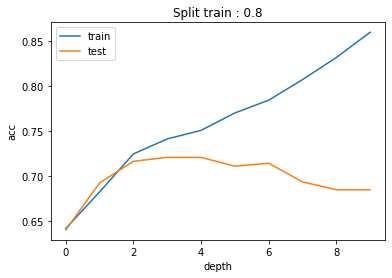

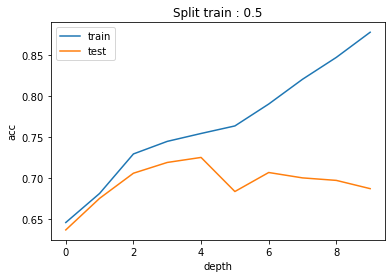

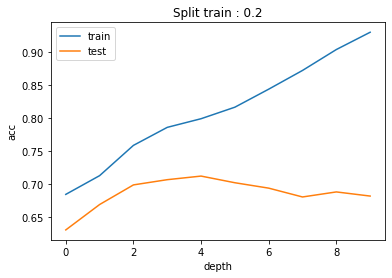

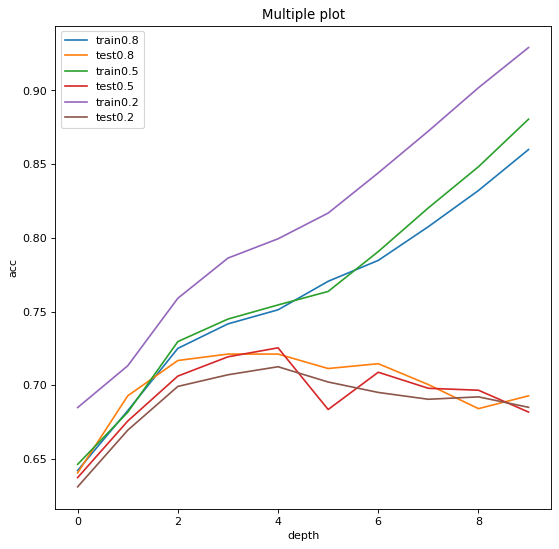

In [8]:
import matplotlib.pyplot as plt

def split_data(x, y, ratio):
    limit = int(ratio*len(x))
    return x[:limit], y[:limit], x[limit:], y[limit:]

def plot_acc(max_depth, datax_train, datay_train, datax_test, datay_test, k):
    acc_train = []
    acc_test = []
    for i in range(max_depth):
        dt = DTree()
        dt.max_depth = i+1
        dt.min_samples_split = 2
        dt.fit(datax_train, datay_train)
        dt.predict(datax_train[:5,:])
        acc_train.append(dt.score(datax_train, datay_train))
        acc_test.append(dt.score(datax_test, datay_test))
    plt.xlabel("depth")
    plt.ylabel("acc")
    plt.plot(acc_train, label="train")
    plt.plot(acc_test, label="test")
    plt.title(str("Split train : " + str(k)))
    plt.legend()
    plt.show()
    
from matplotlib.pyplot import figure
    
def multiple_plot_acc(max_depth, datax_train, datay_train, datax_test, datay_test, k):
    figure(figsize=(8, 8), dpi=80)
    acc_train_tot = []
    acc_test_tot = []
    for elt in k:
        datax_train, datay_train, datax_test, datay_test = split_data(datax, datay, elt)
        acc_train = []
        acc_test = []
        for i in range(max_depth):
            dt = DTree()
            dt.max_depth = i+1
            dt.min_samples_split = 2
            dt.fit(datax_train, datay_train)
            dt.predict(datax_train[:5,:])
            acc_train.append(dt.score(datax_train, datay_train))
            acc_test.append(dt.score(datax_test, datay_test))
        acc_train_tot.append(acc_train)
        acc_test_tot.append(acc_test)
    plt.xlabel("depth")
    plt.ylabel("acc")
    for i in range(len(acc_train_tot)):
        plt.plot(acc_train_tot[i], label=str("train"+str(k[i])))
        plt.plot(acc_test_tot[i], label=str("test"+str(k[i])))
    plt.title("Multiple plot")
    plt.legend()
    plt.show()

max_depth = 10
for k in [0.8, 0.5, 0.2]:
    datax_train, datay_train, datax_test, datay_test = split_data(datax, datay, k)
    plot_acc(max_depth, datax_train, datay_train, datax_test, datay_test, k)
multiple_plot_acc(max_depth, datax_train, datay_train, datax_test, datay_test, k=[0.8, 0.5, 0.2])

# Quand il y a peu de d'exemple d'apprentissage : l'accuracy train tend vers 1 rapidement et l'overfit est fort et l'accuracy test est a 0.7
# Quand il y a beaucoup d'exemple d'apprentissage : l'accuracy train tend moins rapidement vers 1 mais mais l'overfit est moins fort et l'accuracy test est un peu plus elevé (0.72)
# Le comportemenet est cependant semblable, les differentes courbes montrent un overfit.

# Les resultats semblent correct mais on perd beaucoup de data pour le train à cause du split
# On peut les ameliorer avec une validation croisee

## Validation croisée : sélection de modèle

Step : 0
Validation chunk index :  0 458


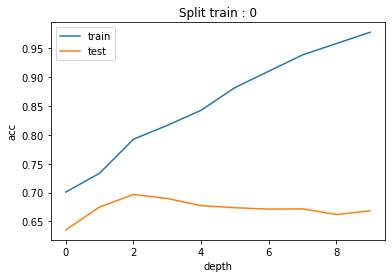

Step : 1
Validation chunk index :  458 916


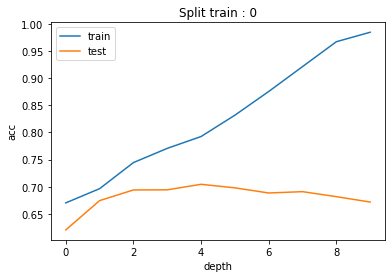

Step : 2
Validation chunk index :  916 1374


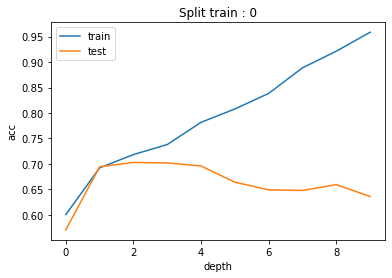

Step : 3
Validation chunk index :  1374 1832


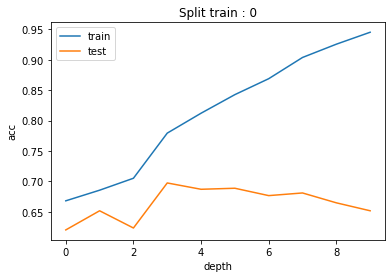

Step : 4
Validation chunk index :  1832 2290


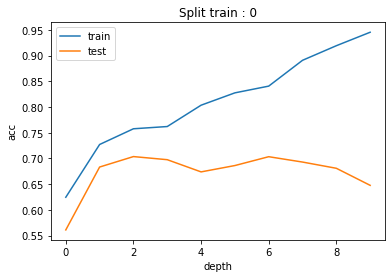

Step : 5
Validation chunk index :  2290 2748


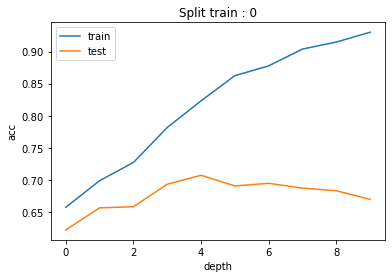

Step : 6
Validation chunk index :  2748 3206


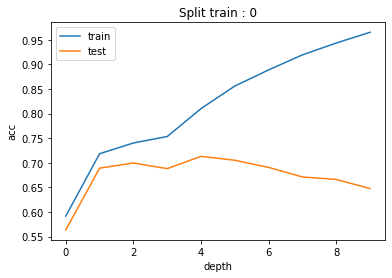

Step : 7
Validation chunk index :  3206 3664


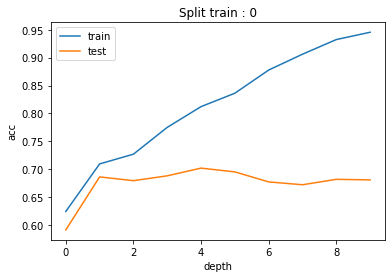

Step : 8
Validation chunk index :  3664 4122


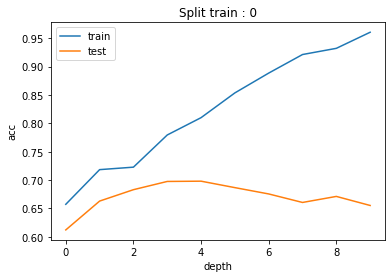

Step : 9
Validation chunk index :  4122 4580


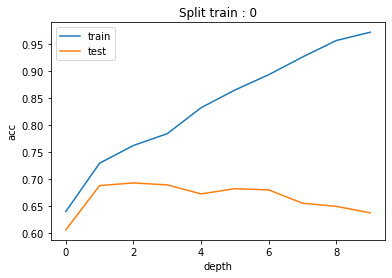

In [9]:
def crossvalid_split(x, y, n_chunk):
    n = x.shape[0]
    interval = n//n_chunk
    for i in range(n_chunk):
        print("Step :", i)
        
        limit = i*interval
        limit2 = (i+1)*interval
        
        print("Validation chunk index : ", limit, limit2)
        
        chunk_x = x[limit:limit2]
        chunk_y = y[limit:limit2]
        
        if i == 0:
            rest_x2 = x[limit2:]
            rest_y2 = y[limit2:]
        else:   
            rest_x2 = np.concatenate((x[0:limit], x[limit2:]), 0)
            rest_y2 = np.concatenate((y[0:limit], y[limit2:]), 0)
                    
        plot_acc(10, chunk_x, chunk_y, rest_x2, rest_y2, 0)

crossvalid_split(datax, datay, 10)